In [1]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Πρώτη μέρα

In [2]:
# Roc
y1=[1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1
]
probs1=[0.33,1,0,1,0.66,1,1,1,0,1,1,0.33,0.66,0.66,0,0,1,0.66,0.33,0,1,0.66,1,0.66,1,0.66,0,0.66,0.66,0,0.66,1,0,1,0,0.66,0.66,0.66,1,1,0.33,0.66,0.33,0.33,0.66,1,1,1,1,0,1,1,1,0,1,0.66,1,0.33,0.66,1,1,1,1,1,0,1,1,1,0.66,0.66,1,1,0,0.66,1,0.66,0.33,0,1,1,1,0,1,0.33,1,0.66,1,0.66,1,0.66,0.66,0,0.33,0.66,1,1,0,1,1,1,0.33,0,1,0.33,0,1,0,0.33,0.33,1,0.33,0.33,1,0,0.33,1,1,0.66,1,1,0.66,0.66,1,0,1,1,1,0.33,1,0.66,1,0.66,1,0.66,0.33,0.66,0.66,0.66,0.66,1,1,1,0.66,0.33,0.66,1,1,0,1,0.66,1,1,0,1,0.66,1,0.66,1,1,0.66,1,0.33,1,1,0.66,0.66,1,1,1,0.66,1,0,1,1,0.66,0.66,0.66,0.66,1,0.33,0.33,1,1,0,0,1,0.33,0.66,0.66,1,0.33,0.33,0.33,1,1,0.66,0,1,0.66,0.66,0,1,0.33,0,1,0,0,0,0.66,0.66,0.66,0,1,0.33,0,0,0.66,0.66,0.33,1,1,1,1,0.33,1,1,1,1,0,1,0.66,1,1,1,1,0.66,1,1,0.66,1,0.66,0,0,0,0.33,0,0.33,0.33,0.33,0,1,0.66,1,0.33,1,1,1,0,1,0.66,0,0.33,0,1,0.66,0.66,1,0,0.66,0,1,1,1,0.33,0.33,0,0.66,0.66,0,1,1,1,1,0,1,0,0.33,0.66,0.33,1,0,0.66,1,1,1,0.33,1,0,1,0.33,0.66,1,0,1,0.66,0.66,1,0,1,1,0,0,0.33,1,0.33,0.66,0,0,1,1,1,0.33,0,1,1,0.33,1,1,1,0.33,0,1,0.66,1,1,1,0.33,1,1,1,0,1,1,1,1,1,0.66,0,0,1,0.66,1,1,1,0.33,1,0.33,0,0,0.66,1,1,1,0.66,1,0.33,0.66,1,1,1,0,0.66,0.33,0.66,1,0,0.33,1,0.33,1,0,0.66,0.66,1,1,1,1,0,0.33,0,0.33,1,0.66,1,0,0.33,0.66,0.33,1,0.33,1,1,0.66,0.33,0,1,0.66,1,0.66,1,0.66,0.66,0.66,0,1,0.33,1,0.66,0.33,1,0,1,1,1,1,0.66,0.33,1,0,0.33,0.33,1,1,0.66,1,1,0.66,1,1,1,0.66,0.66,1,0,0.33,0.66,1,0.33,0.33,0,0.66,0.66,1,0.33,1,1,0.66,1,1,1,1,0.33,1,1,1,0.33,0.33,0.33,0,0.66,1,0.33,0.66,0.66,0.33,0.33,1,0,1,0.66,0.66,1,0.66,1,1,1,1,0.66,0.33,0.66,0,1,0.66,0.66,1,0.33,1,0.66,1,0.66,0.66,1,0.33,0.33,1,1,0.33,1,1,1,1,0.33,0.33,0.66,0.33,0.33,1,0,0.33,0.66,0,1,1,1,1,1,1,1,0.66,0.66,0.66,0.33,1,1,0,0,1,1,0.66,0.66,1,1,0,0,1,0,0,1,1,0.66,1,1,1,1,0.33,1,0,1,0.66,0.33,1,1,0.33,1,0.66,0.66,1,1,1,1,1,0.66,1,0,0.33,0,0,0.66,0,1,0.66,0.66,0.66,0.33,0.66,1,0,1,1,0.66,1,1,1,1,1,0.33,0,1,1,1,1,1,1,0,1,1,0,0.33,1,0,1,0.33,1,1,0.33,0.33,1,1,0.33,0.66,1,1,0,0.33,1,1,0.66,1,1,0.66,0.33,0.33,0.33,1,1,0.33,0.66,0,1,1,0.33,0.66,1,0.66,1,1,0,1,1,1,0,0.33,1,0.33,0,0,1,0.33,0.66,1,0,0.66,0.33,1,1,0.66,1,1,1,0,0.66,0,1,1,1,0.33,0,1,1,0.33,1,0,1,0.66,0,1,1,0.66,1,1,0.33,1,1,0.33,0.66,1,0,0.33,0,0,0,1,0.66,0,0.66,1,0.33,0.33,0.66,0.33,1,0.66,0.66,1,1,0.33,0.33,1,1,0.66,0,0,0.33,1,1,0.66,1,1,1,0.33,0.66,0.66,1,1,1,1,0.33,0.33,1,0,1,1,0.33,1,1,0.66,0,0.33,0.66,0.33,1,0,0,0.66,0,0.66,0.33,1,1,0.66,0.66,1,0.33,0.33,1,1,1,1,1,0.66,0.66,0.66,1,1,0.66,0.33,1,1,0.33,0.33,0.33,0.66,1,0.33,1,1,1,0.66,0.33,1,0,0.66,1,0.33,1,0.66,1,0.66,1,1,0.33,1,0.66,0.33,0.33,0.33,0.33,0,0,1,0,0,0.66,0,0,0,1,1,1,1,0,0.66,1,1,0.66,0.66,0.33,0.33,0.66,0,0.33,0.33,0,0.33,1,1,1,1,1,1,0.66,0.66,0.33,1,0.66,1,0.66,1,0.33,0,0.66,0.66,0.33,0.33,1,0,0,0.66,1,1,1,0.66,1,0.33,0,0.66,1,1,0.33,0.66,0.66,0.33,1,1,1,1,1,1,1,0.66,0,1,0.66,1,1,1,0,0.66,0.66,1,1,0.66,1,0.66,0,0,1,0.33,0,1,0,0.66,0.33,0,1,0.66,0.66,0.33,1,1,0.66,1,0,1,0.33,0.66,0.33,0.66,0.33,0.66,1,0.66,0.33,1,0,1,0.66,1,1,1,1,0.66,1,0.66,1,1,1,0.33,1,1,0.66,1,1,1,0,0.66,1,0.33,1,0.33,0,1,0.66,1,1,0.33,1,1,0.66,0.66,0.33,0.66,1,0,1,1,0,0,0.66,0.33,0,1,0,1,1,1,0.66,0.66,0.66,1,1,0.66,0.66,0.66,1,1,0.66,0.33,1,1,0.33,0.33,0.66,1,0.33,0,1,0.66,1,1,0.33,1,0,0.33,1,0.33,1,0.66,0.33,1,1,0.33,0.66,0.33,1,1,0.66,1,1,1,1,0,1,0.33,1,0,0,1,0.33,0.33,0.66,1,1,0,0.33,1,1,0.33,1,1,1,1,1,0,1,1,1,1,0.33,0.33,1,0,1,0.66,1,1,1,1,0.66,1,0.33,0
]

0.47719399538106233


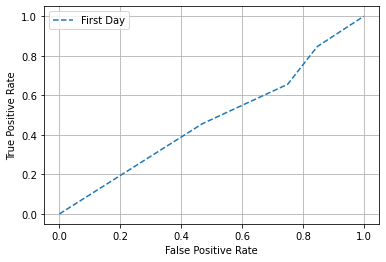

In [3]:
print(roc_auc_score(y1, probs1))
fpr1, tpr1, thresholds1 = roc_curve(y1, probs1)
pyplot.plot(fpr1, tpr1, linestyle='--', label='First Day')

pyplot.xlabel('False Positive Rate') # Εκτυπώνει τον τίτλο του Χ
pyplot.ylabel('True Positive Rate') # Εκτυπώνει τον τίτλο του Υ
pyplot.legend() #Εκτυπώνει το label
pyplot.grid(True) # Εκτυπώνει τα τετράγωνα
#print(thresholds1)
#print(fpr1)
#print(tpr1)
pyplot.show()

# Δεύτερη Μέρα

In [4]:
# Roc δεύτερης μέρας
y2=[1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
]

probs2=[0.33,1,0,1,0.66,0.66,1,1,0.33,1,0.5,0.33,0.83,0.33,0,0,1,0.83,0.33,0,1,0.66,1,0.83,1,0.66,0,0.33,0.83,0.16,0.83,1,0,1,0.33,0.66,0.83,0.83,1,0.83,0.66,0.66,0.16,1,1,0.83,0,1,0.66,1,0,0.83,0.66,1,0.66,0.83,1,0.83,1,0.83,1,0,0.83,1,1,0.5,0.83,1,0.66,0,0.83,1,0.5,0.66,0.33,1,1,1,0,1,0.16,1,0.83,1,0.5,1,0.83,0.83,0.16,0.5,0.83,0.83,1,0,1,1,1,0.16,0,1,0.5,0.16,1,0,0.16,0.16,0.83,0.16,0.16,1,0,0.33,1,1,0.5,1,1,0.83,0.66,1,0,1,1,0.33,1,0.33,1,0.83,0.83,0.16,0.83,0.66,0.66,0.33,1,0.5,0.83,0.83,0.16,0.83,1,0.33,1,0.83,0.66,0,1,0.83,1,0.83,1,0.83,0.83,1,0.16,1,1,0.83,0.83,1,1,0.5,0.16,1,0.33,0.66,0.66,0.33,0.16,0.5,1,0,0,1,0.66,1,0.16,0.16,0.5,0.83,0.83,0,1,0.83,0,1,0.16,0,1,0,0,0.16,0.83,0.83,0.33,0.5,0.16,0.16,0,0.83,0.83,0.66,1,0.66,1,0.16,0.83,1,0.66,0.33,0.66,0.83,0.83,0.83,1,1,0.33,1,1,0.83,1,0.83,0.5,0.33,0,0.16,0,0.33,0.5,0.66,0,1,0.83,1,0.16,1,1,0,1,0.5,0,0.66,0.33,0.83,0.83,0.5,1,0.16,0.83,0,1,1,0.66,0.5,0.5,0,0.33,0.83,0,0.5,0.66,1,1,0,1,0,0.33,0.83,0.66,1,0,0.5,1,1,1,0.66,0.83,0,1,0.5,0.5,0,1,0.83,0.83,1,0.33,0.83,0.33,0,0.66,1,0.5,0,0.5,1,1,0.5,0,0.83,1,0.16,0.83,1,1,0.16,0,1,0.66,1,1,1,0.33,1,1,0.16,0.66,1,1,0.83,0.16,0.5,1,0.66,1,0.83,1,0.16,1,0.5,0,0.33,0.66,1,1,1,0.83,0.83,0.66,0.66,1,1,1,0.16,0.83,0.66,0.83,1,0.5,0.83,0.16,1,0,0.66,0.83,0.83,1,1,0.83,0,0.33,0,0.33,1,0.66,1,0,0.33,0.66,0.66,1,0.33,1,1,0.66,0.16,0,1,0.66,1,0.83,0.5,0.5,0.83,0.33,1,0.16,1,0.83,0.16,1,0,1,0.5,1,0.83,0.83,0.66,1,0,0.33,0.5,1,1,0.5,0.5,1,0.33,0.5,0.83,0.83,0.66,0.33,0.5,0.66,0.83,1,0.33,0.16,0,0.83,0.33,0.66,1,1,0.5,1,1,0.83,1,0.33,1,0.83,1,0.16,0.5,0.5,0.16,0.83,0.33,0.83,0.66,0.66,0.16,1,0,0.66,0.83,1,1,0.83,0.83,0.83,0.66,0.83,0.5,1,0.66,0.66,0.66,1,0.83,1,0.66,0.66,1,0.5,0.66,1,1,0.5,1,0.83,1,0.66,0.33,0.83,0.66,0.16,1,0.5,0.83,0,1,1,0.83,1,1,1,1,0.83,0.66,0.16,1,1,0,0.33,1,1,0.83,0.5,1,1,0.16,0,1,0.33,0.33,1,1,0.83,1,1,1,1,0.33,1,0.5,1,0.33,0.33,1,1,0.5,1,0.83,0.83,1,1,0.5,1,0.66,0.83,1,0,0.16,0.33,0,0.83,0,1,0.83,0.83,0.66,0.16,0.83,1,0.16,1,0.83,0.33,1,1,1,0.16,0.16,1,1,0.83,0.83,0,1,1,0,0.16,0.66,0.5,0.5,0.83,1,0.66,0.5,0.5,1,0.33,1,0,0.16,1,0.83,0.5,1,0.83,0.16,0.33,0.16,0.83,1,0.16,0.83,0.16,1,0.66,0.66,0.66,1,1,0,1,1,1,0,0.66,1,0.5,0.16,0,0.66,0.16,0.66,1,0,0.83,0.5,1,1,0.83,0.83,1,0.5,0.66,1,1,0.83,0.66,0,1,1,0.66,1,0,0.5,0.33,0,1,1,0.83,1,1,0.33,0.83,1,0.5,0.83,1,0.33,0.33,0,0,0,1,0.83,0,0.83,1,0.16,0.16,0.66,1,0.66,0.66,1,0.33,0.66,1,1,0.83,0,0.33,0.5,1,0.83,1,1,0.83,0.16,0.83,0.66,1,0.83,1,0.83,0.16,0.33,1,0.5,0.83,0.5,1,0.83,0,0.16,0.83,0.16,1,0.16,0.33,0.5,0,0.66,0.16,0.83,1,0.66,0.83,1,0.16,0.66,1,0.66,0.83,0.83,1,0.83,0.5,1,1,0.83,0.66,0.83,1,0.33,0.16,0.33,0.66,1,0.5,0.83,1,0.83,0.66,0.16,0.83,1,0.66,0.83,0.83,1,0.83,1,1,0.16,1,0.5,0.33,0.16,0.5,0.66,0.5,0,0,0,0.5,0.5,0,0,1,1,0,0.83,1,0.66,0.83,0.5,0.16,0.66,0.66,0.33,0.16,0.66,0.16,0.5,1,1,1,0.83,1,1,0.83,0.83,0.33,1,0.83,1,0.33,1,0,0.83,0.5,0.5,0.16,1,0,0,0.5,1,1,0.66,0.66,0,0.66,0.33,0.5,0.66,0.33,1,1,0.83,0.5,1,0.83,0.16,0.83,0.83,1,1,0,0.5,1,1,0.66,1,0.83,0,0.33,1,0.5,0.33,0,0.83,0.5,0.16,1,0.5,0.5,0.5,1,0.83,0.66,1,0,1,0.16,0.83,0.5,0.33,0.5,1,0.66,0.33,1,0,1,0.5,1,1,1,1,0.83,0.83,1,1,1,0.16,0.83,1,0.33,1,1,0.83,0,0.83,1,0.16,1,0.5,0,1,0.66,1,1,0.16,1,0.83,0.83,0.66,0.5,1,0,1,0.5,0.16,0.16,0.83,0.16,0.33,1,0,0.83,0.83,0.33,0.83,0.83,1,0.5,0.33,0.83,0.83,0.66,1,1,0.33,0.66,0.66,1,0.5,0,1,0.83,1,1,0.16,1,0.16,0.33,0.83,0.16,0.66,0.5,0.33,1,0.83,0.16,0.83,0.5,1,1,0.66,1,1,1,1,0.5,1,0.5,1,0,0,1,0.66,0.16,0.66,1,0.33,0.66,1,0.83,0.66,1,1,0.66,1,0,1,1,0.83,1,0.66,1,0,0.83,0.83,1,1,1,1,0.83,0.83,0.33,0.33
]

0.49368523949169113


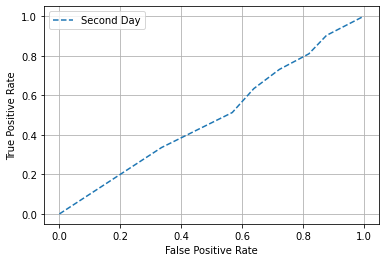

In [5]:
print(roc_auc_score(y2, probs2))
fpr2, tpr2, thresholds2 = roc_curve(y2, probs2)
pyplot.plot(fpr2, tpr2, linestyle='--', label='Second Day')

pyplot.xlabel('False Positive Rate') # Εκτυπώνει τον τίτλο του Χ
pyplot.ylabel('True Positive Rate') # Εκτυπώνει τον τίτλο του Υ
pyplot.legend() #Εκτυπώνει το label
pyplot.grid(True) # Εκτυπώνει τα τετράγωνα
#print(thresholds1)
#print(fpr1)
#print(tpr1)
pyplot.show()

# Τρίτη Μέρα

In [6]:
# Roc τρίτης μέρας
y3=[1,1,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
]
probs3=[0.222,0,1,0.666,0.666,0.777,0.555,0.666,0.555,0.888,0.222,0.111,0.111,1,0.777,0.444,0,1,0.555,1,0.888,1,0.777,0.111,0.222,0.888,0.111,0.888,1,0.111,1,0.444,0.777,0.888,0.888,1,0.777,0.777,0.555,0.222,1,0.888,0,0.555,1,0,0.777,0.555,0.777,1,0.777,0.888,0.555,1,0,0.666,1,0.888,0.666,0.777,0.888,0.555,0,0.888,0.555,1,1,1,0.111,1,0.111,0.888,1,0.666,0.888,0.888,0.444,0.666,0.777,0,1,1,0.444,0.111,1,0.555,1,0.111,0.111,0.444,0.888,0.222,0.222,1,0.111,0.222,1,0.666,0.333,1,1,1,0,0.444,1,0.222,1,0.888,0.888,0.111,0.888,0.444,0.777,0.555,1,0.555,0.888,0.888,0.222,0.888,0.666,0.555,1,0.777,0.666,0.777,0.888,1,0.888,1,0.111,1,1,0.888,0.888,1,0.777,0.666,0.111,1,0.444,0.666,0.777,0.444,0.111,0.666,1,0,0,0.666,1,0.111,0.111,0.666,0.666,0.777,0,0.888,0.888,0,1,0.222,0,0,0.111,0.111,0.888,0.888,0.555,0.666,0.111,0.444,0,0.888,0.888,0.777,1,0.444,1,0.111,0.888,0.555,0.444,0.444,0.888,0.888,0.888,1,0.222,1,0.888,1,0.888,0.666,0,0.111,0.222,0.222,0.777,0.777,1,0.333,1,1,0.222,1,0.666,0,0.555,0.777,0.777,1,0.888,0,1,1,0.777,0.555,0,0.333,0.888,0.222,0.555,0.777,1,0,1,0,0.222,0.777,1,0,0.555,0.888,1,1,0.777,0,0.888,0.666,0.666,0.111,1,0.888,1,0.333,0.777,0.444,0.111,0.777,0.888,0.666,0,0.555,1,1,0.555,0,0.111,0.888,1,0.111,0,1,0.777,1,0.777,0.444,1,1,0.222,0.555,0.666,1,0.888,0.111,0.555,1,0.666,0.888,1,1,0.333,0,0.222,0.777,1,0.888,0.777,0.888,0.777,0.777,1,0.777,1,0.888,0.777,1,0.111,0,0.666,0.888,0.888,0.888,0,0.444,0,0.333,0.444,1,0.111,0.333,0.777,0.777,1,0.333,1,0.333,0,0.666,1,0.888,0.555,0.555,0.888,0.444,0.111,1,0.888,0.111,1,0.111,0.666,0.333,1,0.555,0.888,0.666,0.111,0.555,0.444,1,0.333,0.444,0.888,0.555,0.555,0.888,0.888,0.777,0.444,0.777,0.888,0.222,0,0.888,0.222,0.777,0.777,0.555,0.888,0.777,0.555,1,0.777,1,0.222,0.666,0.666,0.333,0.777,0.222,0.888,0.444,0.666,0.111,1,0,0.777,0.888,1,1,0.777,0.777,0.777,0.888,0.666,1,0.777,0.555,0.777,1,0.666,0.666,0.888,0.666,0.777,1,1,0.666,1,0.444,0.333,0.888,0.777,0.111,1,0.666,0.888,0,1,1,0.777,1,1,1,0.888,0.111,1,0.888,0,0.444,1,1,0.888,0.666,1,1,0.333,0,1,0.333,0.555,0.888,0.777,1,1,1,1,0.222,1,0.666,1,0.555,0.555,1,1,0.333,0.888,0.888,0.888,1,0.666,0.333,1,0.666,0.888,0,0.111,0.333,0.111,0.888,0,1,0.888,0.777,0.111,0.888,1,0.333,1,0.777,0.222,1,1,1,0.111,0.444,1,1,0.888,0.666,0.111,1,0,0.333,0.555,0.666,0.666,0.888,0.555,0.444,0.444,0,0.222,0.888,0.777,0.111,0.444,0.111,0.777,0.444,0.888,0.111,0.777,0.444,0.777,0.777,1,0,1,1,0.222,0.777,1,0.666,0.444,0.111,0.555,0.111,0.777,0.888,0.333,0.888,0.555,1,0.888,0.888,0.888,1,0.666,0.666,0,1,0.666,0.777,1,0,0.666,0,1,0.888,1,0.555,0.777,1,0.555,0.777,0.333,0.333,0.111,0,0.111,1,0.888,0,0.888,1,0.111,0.111,0.777,1,0.777,0.777,1,0.333,0.777,1,0.888,0.888,0,0.555,0.555,1,1,0.333,0.777,0.555,1,0.777,1,0.888,0.333,0.333,1,0.888,0.666,0.666,0.888,0,0.111,0.888,0.222,0.555,0.222,0.555,0.111,0.777,1,0.777,0.888,1,0.111,0.777,1,0.666,0.777,0.777,1,0.888,0.333,0.888,1,0.666,0.666,0.555,0.444,0.333,0.444,1,0.555,0.777,1,0.888,0.444,0.777,0.888,0.777,1,0.888,0.888,1,0.333,1,0.666,0.444,0.222,0.777,0.444,0,0.111,0.333,0.666,0.666,0,0,0.888,0.777,0.111,0.888,1,0.555,0.666,0.555,0.333,0.777,0.777,0.333,0.111,0.666,0.444,0.444,0.888,0.555,1,1,0.888,0.888,0.333,1,1,0.222,1,0.888,0.444,0.666,0.333,1,0,0,0.333,1,0.777,0,0.777,0.555,0.666,0.777,0.333,0.888,1,0.888,0.444,1,0.888,0.222,0.888,0.777,1,1,0,0.333,0.888,0.888,0.555,1,0.888,0.111,0.555,0.333,0.222,0.888,0.666,0.333,1,0.333,0.666,0.555,1,0.888,1,0,1,0.222,0.888,0.666,0.555,0.666,0.888,0.444,1,0,1,0.555,0.888,1,1,1,0.777,0.888,0.777,0.111,0.888,1,0.555,0.111,0.777,1,0.111,1,0.666,0.111,1,0.777,1,0.111,1,0.888,0.888,0.777,0.666,0,0.888,0.444,0.444,0.444,0.111,0.555,0.777,0,0.555,0.888,0.222,0.777,0.888,0.666,0.222,0.888,0.888,0.777,1,0.555,0.777,0.777,0.666,0,0.777,1,1,0.111,1,0.111,0.222,0.888,0.222,0.555,0.666,0.222,1,0.666,0.111,0.888,0.333,0.666,1,0.777,0.888,1,1,0.666,0.777,0.666,0.111,0.111,0.777,0.111,0.777,0.555,0.777,1,0.888,0.888,0.777,0.888,0.111,1,0.888,1,0.777,0.888,0.111,0.888,0.888,1,1,1,1,0.888,0.888,0.333,0.555
]

0.4975665748393021


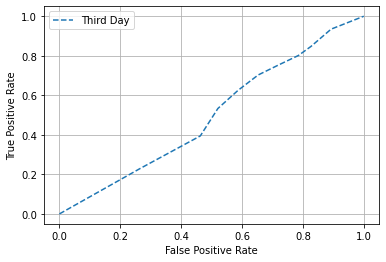

In [7]:
print(roc_auc_score(y3, probs3))
fpr3, tpr3, thresholds3 = roc_curve(y3, probs3)
pyplot.plot(fpr3, tpr3, linestyle='--', label='Third Day')

pyplot.xlabel('False Positive Rate') # Εκτυπώνει τον τίτλο του Χ
pyplot.ylabel('True Positive Rate') # Εκτυπώνει τον τίτλο του Υ
pyplot.legend() #Εκτυπώνει το label
pyplot.grid(True) # Εκτυπώνει τα τετράγωνα
#print(thresholds1)
#print(fpr1)
#print(tpr1)
pyplot.show()

# Τέταρτη Μέρα

In [8]:
# Roc τέταρτης μέρας
y4=[1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1
]
probs4=[0.166,0,1,0.75,0.75,0.666,0.666,0.75,0.666,0.166,0.333,0.166,1,0.833,0.416,0.25,0.5,1,0.916,1,0.833,0.083,0.166,0.916,0.333,0.916,1,0.083,1,0.583,0.916,0.75,0.833,0.666,0.166,1,0.916,0,0.5,0,0.666,0.5,1,0.833,0.833,0.583,1,0,0.5,0.916,0.666,0.833,0.416,0,0.416,1,1,0.083,1,0.083,0.916,1,0.75,0.583,0.666,0.833,0,1,1,0.583,0.25,0.916,0.583,1,0.083,0.083,0.583,0.916,0.166,0.333,1,0.25,0.166,1,0.5,0.333,1,1,0.25,0.333,0.166,1,0.916,0.916,0.083,0.333,0.833,0.666,1,0.583,0.916,0.916,0.416,0.916,0.5,0.666,1,0.833,0.5,0.666,0.833,1,0.833,1,0.083,1,1,0.916,0.916,0.833,0.833,0.666,0.166,1,0.583,0.5,0.666,0.5,0.083,0.75,0,0,0.75,1,0.25,0.083,0.666,0.833,0,0.833,0.916,0,0.166,0,0,0.083,0.25,0.916,0.916,0.666,0.75,0.166,0.583,0,0.916,0.75,1,0.25,0.916,0.583,0.416,0.333,0.833,1,0.166,1,0.916,0.75,0.25,0.166,0.416,0.166,0.833,0.5,1,0.416,0.166,0.666,0.833,1,0.916,0,0.833,0.5,0,0.416,0.916,0.416,0.666,0.666,1,0,1,0,0.166,1,0,0.666,0.916,1,1,0.916,0.75,0.583,0.083,1,0.916,1,0.5,0.833,0.583,0.083,0.666,0.666,0.166,0.666,1,0.416,0,0.083,0.916,0.916,0.083,0,1,0.833,0.583,0.5,1,0.166,0.666,0.666,1,0.916,0.083,0.666,0.5,0.916,1,0.25,0,0.166,0.75,1,0.666,0.833,0.833,1,0.75,0.75,1,0.083,0,0.75,0.833,0.916,0.916,0,0.416,0,0.25,0.333,0.916,0.333,0.5,0.833,1,0.25,0.916,0.5,0,0.666,0.583,0.5,0.916,0.5,0.166,0.916,0.083,1,0.333,0.75,0.5,1,0.583,0.916,0.5,0.25,0.666,0.5,0.25,0.416,0.833,0.583,0.916,0.833,0.583,0.833,0.333,0,0.916,0.166,0.583,0.583,0.583,0.75,0.666,0.5,0.833,0.416,0.666,0.75,0.5,0.75,0.166,0.916,0.333,0.666,0.083,1,0,0.916,1,1,0.75,0.666,0.916,0.833,0.416,1,0.75,0.916,0.5,1,1,0.666,1,0.333,0.333,0.916,0.083,0.916,0,1,1,1,1,1,0.916,0.083,1,0,0.416,1,0.916,0.75,0.916,0.416,0,1,0.333,0.666,0.916,0.75,1,1,0.333,1,0.75,1,0.5,0.916,1,0.416,0.916,0.916,1,0.583,0.25,1,0.666,0.916,0,0.083,0.5,0.166,0.916,0.083,1,0.916,0.25,0.916,1,0.416,0.166,1,1,1,0.083,0.916,0.916,0.666,0.333,1,0.166,0.5,0.583,0.75,0.75,0.916,0.5,0.416,0.5,0,0.333,0.916,0.833,0.083,0.5,0.083,0.833,0.583,0.916,0.083,0.833,0.333,0.833,0.166,1,1,0.333,0.833,1,0.583,0.583,0.25,0.416,0.083,0.833,0.916,0.5,0.833,0.666,1,0.833,0.916,0.75,0.75,0.75,0,1,0.5,1,0,0.75,0.25,1,0.833,0.666,0.75,0.5,0.333,0.25,0.083,0.333,1,0.916,0,0.833,1,0.083,0.166,0.833,1,1,0.25,0.916,0.916,0,0.583,0.916,1,0.25,0.75,0.583,0.833,0.5,0.5,0.916,0.916,0.666,0.583,0.916,0.25,0.083,0.916,0.416,0.666,0.416,0.5,0.083,0.833,1,0.916,1,0.083,0.833,0.5,0.666,0.833,0.916,0.916,0.25,0.833,0.75,0.666,0.666,0.583,0.25,0.333,0.666,0.833,1,0.583,0.666,1,0.916,1,0.25,1,0.75,0.583,0.333,0.833,0.5,0,0.083,0.5,0.75,0.083,0,0.666,0.083,0.916,1,0.666,0.5,0.666,0.5,0.833,0.333,0.083,0.583,0.5,0.916,0.583,1,0.916,0.25,0.833,0.916,0.25,1,0.916,0.583,0.75,0.333,1,0,0,0.333,0.75,0,0.75,0.833,0.916,1,0.916,0.583,1,0.25,0.833,0.833,1,1,0,0.5,0.916,0.916,0.666,1,0.166,0.416,0.25,0.666,0.5,1,0.75,0.666,1,0.916,1,0,1,0.166,0.916,0.75,0.916,0.5,1,0,0.833,0.583,0.916,1,1,0.75,0.583,0.166,0.916,1,0.583,0.333,0.833,1,0.25,0.916,0.75,0.25,0.916,0.833,0.083,1,0.75,0.666,0,0.833,0.583,0.5,0.166,0.666,0.833,0,0.5,0.916,0.166,0.75,0.916,0.75,0.166,0.916,0.916,0.666,0.833,0.833,0.666,0,0.833,1,1,0.083,1,0.083,0.166,0.166,0.416,0.666,0.166,1,0.75,0.083,0.416,0.5,1,0.75,1,0.916,0.75,0.333,0.166,0.833,0.083,0.666,0.833,0.916,0.916,0.833,0.916,0.25,1,0.916,0.833,0.333,0.916,0.75,1,1,1,1,0.416
]

0.46998418946824994


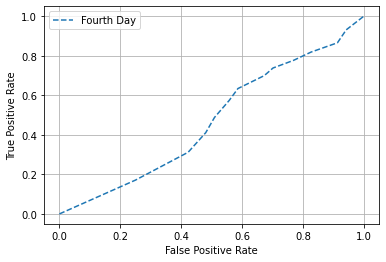

In [9]:
print(roc_auc_score(y4, probs4))
fpr4, tpr4, thresholds4 = roc_curve(y4, probs4)
pyplot.plot(fpr4, tpr4, linestyle='--', label='Fourth Day')

pyplot.xlabel('False Positive Rate') # Εκτυπώνει τον τίτλο του Χ
pyplot.ylabel('True Positive Rate') # Εκτυπώνει τον τίτλο του Υ
pyplot.legend() #Εκτυπώνει το label
pyplot.grid(True) # Εκτυπώνει τα τετράγωνα
#print(thresholds1)
#print(fpr1)
#print(tpr1)
pyplot.show()